In [2]:
import pandas as pd

war_df = pd.read_csv('../data/final/132-war-days.csv',
                     compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1},
                     index_col=[0])

In [ ]:
war_df.head()

In [394]:
war_df["Publisher"].value_counts()

ΝΑΥΤΕΜΠΟΡΙΚΗ               4628
ΚΑΘΗΜΕΡΙΝΗ                 3230
THE GUARDIAN               3205
ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ    2400
Name: Publisher, dtype: int64

In [12]:
ram = war_df.memory_usage(deep=True).sum()
print(ram)

174556111


In [3]:
import prototypes.datamodel as model
from pandas.api.types import CategoricalDtype

publisher_enum = CategoricalDtype(
    categories=[model.Publishers.KATHIMERINI.value,
                model.Publishers.EFSYN.value,
                model.Publishers.NAFTEMPORIKI.value,
                model.Publishers.THE_GUARDIAN.value],
    ordered=True)

lang_enum = CategoricalDtype(
    categories=[model.Lang.GREEK.value,
                model.Lang.ENGLISH.value],
    ordered=True)

sentiments_enum = CategoricalDtype(
    categories=[model.Sentiments.NEGATIVE.value,
                model.Sentiments.POSITIVE.value,
                model.Sentiments.NEUTRAL.value],
    ordered=True)

## Casting & df Optimization
`REDUCE MEMORY USAGE`

In [4]:
war_df['Publisher'] = war_df['Publisher'].astype(publisher_enum)
war_df['Date Formatted'] = pd.to_datetime(war_df['Date Formatted'], format="%Y-%m-%d")
war_df['Lang'] = war_df['Lang'].astype(lang_enum)
war_df['Tag'] = war_df['Tag'].astype('category')
war_df['Text'] = war_df['Text'].fillna('').astype('string')
war_df['Comments count'] = war_df['Comments count'].astype('int32')
war_df['Comments api key'] = war_df['Comments api key'].fillna('').astype('string')
war_df['Article url'] = war_df['Comments api key'].astype('string')
war_df['Heading'] = war_df['Heading'].astype('string')
war_df['Year'] = war_df['Year'].astype('int16')
war_df['Month'] = war_df['Month'].astype('int8')
war_df['Day'] = war_df['Day'].astype('int8')
war_df['Lemma'] = war_df['Lemma'].fillna('').astype('string')
war_df['Sentiments'] = war_df['Sentiments'].astype(sentiments_enum)
war_df.dtypes

Publisher                 category
Date Formatted      datetime64[ns]
Lang                      category
Heading                     string
Tag                       category
Text                        string
Comments exist                bool
Comments count               int32
Comments api key            string
Article url                 string
Chars                        int64
Words                        int64
Year                         int16
Month                         int8
Day                           int8
Lemma                       string
Lemma_unique                 int64
Sentiments                category
Positivity                 float64
Negativity                 float64
dtype: object

In [15]:
ram_new = war_df.memory_usage(deep=True).sum()
print(ram_new)

168152401


<AxesSubplot:>

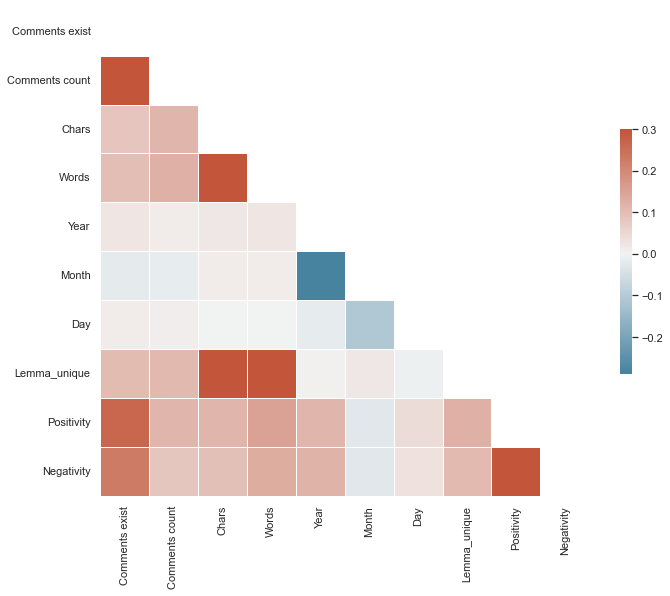

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
rs = np.random.RandomState(33)
d = war_df
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Data Visualization

In [17]:
war_df['Sentiments'].value_counts()

negative    7264
positive    5619
neutral      580
Name: Sentiments, dtype: int64

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import datetime

fig = plt.figure(figsize=(20, 10))
ax = sns.scatterplot(x='Date Formatted',
                     y='Words',
                     hue='Publisher',
                     legend='full',
                     data=war_df,
                     palette=sns.color_palette("Set1", n_colors=4))
max_transistors_per_year = war_df.groupby('Date Formatted')['Words'].max()
sns.lineplot(data=max_transistors_per_year,
             ax=ax.axes,
             color='black')
ax.set_xlim(datetime.date(2022, 2, 1), war_df['Date Formatted'].max())
ax.set(title= 'Scatter plot - Word count by Day')
plt.show()

In [52]:
from matplotlib.pyplot import savefig

fig.savefig('../reports/1-words-date-trans.png',
            format='png',
            dpi=300,
            bbox_inches='tight',
            transparent=True,
            pad_inches=0.5)

In [ ]:
import datetime

fig = plt.figure(figsize=(20, 10))
ax = sns.scatterplot(x='Date Formatted',
                     y='Words',
                     hue='Sentiments',
                     legend='full',
                     data=war_df,
                     palette=sns.color_palette("Set1", n_colors=3))
max_transistors_per_year = war_df.groupby('Date Formatted')['Words'].max()
sns.lineplot(data=max_transistors_per_year,
             ax=ax.axes,
             color='black')
ax.set_xlim(datetime.date(2022, 2,20), datetime.date(2022, 3,20))
ax.set(title= 'Scatter plot - Sentiments from 20 February 2022 - 20 March 2022')
plt.show()

In [ ]:
ax = sns.jointplot(x='Month',
                y='Negativity',
                data=war_df[war_df['Date Formatted'] > '2022-02-01'],
                kind="reg",
                truncate=False,
                marginal_kws={'bins': 14},
                color="c",
                height=8,
                   )
plt.show()

In [ ]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=war_df[war_df['Date Formatted'] > '2022-02-01'],
    x="Positivity",
    y="Negativity",
    hue="Publisher",
    kind="kde",
    height=10,
    aspect=1,
    marginal_ticks=True
)
g.ax_marg_x.set_xlim(0, 0.5)
g.ax_marg_y.set_ylim(0, 0.5)

In [ ]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=war_df[war_df['Date Formatted'] > '2022-02-01'],
    x="Positivity",
    y="Negativity",
    hue="Publisher",
    kind="kde",
    height=10,
    aspect=1,
    marginal_ticks=True
)

In [ ]:
g.ax_marg_y.set_ylim(0, 0.5)
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=war_df[war_df['Date Formatted'] > '2022-02-01'],
    x="Positivity",
    y="Negativity",
    hue="Sentiments",
    kind="kde",
    height=10,
    aspect=1,
    marginal_ticks=True
)

In [ ]:
efsyn = sns.relplot(x="Date Formatted",
            y="Words",
            size="Negativity",
            hue='Sentiments',
            sizes=(0, 100),
            height=8,
            aspect=2,
            data=war_df[(war_df['Date Formatted'] > '2022-02-01')
                        & (war_df['Publisher'] == model.Publishers.EFSYN.value)])\
    .set(title= model.Publishers.EFSYN.value)

In [ ]:
guardian = sns.relplot(x="Date Formatted",
            y="Words",
            size="Negativity",
            hue='Sentiments',
            sizes=(0, 100),
            height=8,
            aspect=2,
            data=war_df[(war_df['Date Formatted'] > '2020-02-01')
                        & (war_df['Publisher'] == model.Publishers.THE_GUARDIAN.value)])\
    .set(title= model.Publishers.THE_GUARDIAN.value)

In [ ]:
kathimerini = sns.relplot(x="Date Formatted",
            y="Words",
            size="Negativity",
            hue='Sentiments',
            sizes=(0, 100),
            height=8,
            aspect=2,
            data=war_df[(war_df['Date Formatted'] > '2020-02-01')
                        & (war_df['Publisher'] == model.Publishers.KATHIMERINI.value)])\
    .set(title= model.Publishers.KATHIMERINI.value)

In [ ]:
naftemporiki = sns.relplot(
    x="Date Formatted",
    y="Words",
    size="Negativity",
    hue='Sentiments',
    sizes=(0, 100),
    height=8,
    aspect=2,
    data=war_df[(war_df['Date Formatted'] > '2020-02-01')
                        & (war_df['Publisher'] == model.Publishers.NAFTEMPORIKI.value)])\
    .set(title= model.Publishers.NAFTEMPORIKI.value)

In [ ]:
war_df['Publisher'].value_counts().sort_values().plot(kind='barh')

In [ ]:
war_df['Tag'].value_counts().head(10).sort_values().plot(kind='barh')

In [ ]:
ax = sns.catplot(x="Date Formatted",
                 y="Negativity",
                 hue="Publisher",
                 height=10, aspect=1.8,
                 capsize=.2,
                 kind="point",
                 data=war_df[war_df['Date Formatted'] > '2022-02-01'])
ax.despine(left=True)
ax.set(title= 'conditional relationships on Negativity values between publishers')
plt.show()

In [ ]:
ax = sns.catplot(x="Publisher",
                 y="Words",
                 hue="Sentiments",
                 height=10, aspect=2,
                 capsize=.2,
                 kind="bar",
                 data=war_df[war_df['Date Formatted'] > '2022-02-01'])
ax.despine(left=True)
plt.show()

In [ ]:
ax = sns.catplot(x="Sentiments",
                 y="Words",
                 hue="Publisher",
                 height=10, aspect=2,
                 capsize=.2,
                 kind="bar",
                 data=war_df[war_df['Date Formatted'] > '2022-02-01'])
ax.despine(left=True)
plt.show()

In [ ]:
ax = sns.catplot(x="Day",
                 y="Publisher",
                 hue="Sentiments",
                 height=10, aspect=2,
                 capsize=.2,
                 kind="bar",
                 data=war_df[war_df['Date Formatted'] > '2022-02-01'])
ax.despine(left=True)
plt.show()

## Distribution plot

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.displot(war_df[war_df['Date Formatted'] > '2022-02-01'],
            x="Date Formatted",
            hue="Sentiments",
            kind="kde",
            fill=True,
            height=8,
            aspect=1.8)

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.displot(war_df[war_df['Date Formatted'] > '2022-02-01'],
            x="Date Formatted",
            hue="Publisher",
            kind="kde",
            fill=True,
            height=8,
            aspect=1.8)

In [ ]:
sns.set(style="white",
        palette="muted",
        color_codes=True)
sns.displot(data=war_df[war_df['Date Formatted'] > '2022-02-01'],
            x="Date Formatted",
            hue="Publisher",
            col="Publisher",
            kde=True)
plt.show()

In [ ]:
sns.set(style="white",
        palette="muted",
        color_codes=True)
sns.displot(data=war_df[war_df['Date Formatted'] > '2022-02-01'],
            x="Date Formatted",
            hue="Sentiments",
            col="Publisher",
            kde=True)
plt.show()

In [ ]:
sns.set(style="white",
        palette="muted",
        color_codes=True)
sns.displot(data=war_df[war_df['Date Formatted'] > '2022-02-01'],
            x="Date Formatted",
            hue="Publisher",
            col="Sentiments",
            kde=True)
plt.show()

## Date as index

In [25]:
war_df.set_index('Date Formatted' , inplace=True)

In [ ]:
import seaborn as sns

correlation_matrix = war_df.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc = {'figure.figsize':(15, 12)})
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
import seaborn as sns
import matplotlib as plt

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=war_df[war_df['Date Formatted'] > '2022-02-01'],
    x="Positivity", y="Negativity",
    hue="Month", size="Words",
    palette=cmap, sizes=(10, 700),  height=10, aspect=1/1
)
g.set(xscale="linear", yscale="linear")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [ ]:
war_df['Words'].groupby(by=war_df.index.month).mean().plot()

In [ ]:
plt.style.use('ggplot')
ax = war_df['Negativity']\
    .resample('M')\
    .mean()\
    .plot(figsize=(16,4),
          color = 'g', label='pos')
war_df['Positivity']\
    .resample('M')\
    .mean()\
    .plot(figsize=(16,4),
          ax = ax,
          label = 'neg', color = 'r').legend()

In [ ]:
ax = war_df['Negativity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
war_df['Positivity'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

In [ ]:
war_df['Negativity'].resample('A').sum().plot(color = 'b',label = 'neg').legend()

In [276]:
import spacy
nlp_en = spacy.load("en_core_web_md")
nlp_el = spacy.load("el_core_news_md")

In [321]:
english_text = war_df[war_df['Lang'] == 'en']['Text'][9:10].str.cat(sep = '')
greek_text = war_df[war_df['Lang'] == 'el']['Heading'][700:701].str.cat(sep = '')

In [322]:
greek_text

'Παιχνίδια πυρηνικού πολέμου στη Βαλτική'

In [ ]:
from pathlib import Path
from spacy import displacy

doc1 = nlp_en('Putin’s looming threat gives Johnson some breathing space')
doc2 = nlp_en('Biden imposes sanctions on company behind Nord Stream 2 gas pipeline – as it happened')
doc3 = nlp_en('Understanding Putin’s narrative about Ukraine is the master key to this crisis')
text = nlp_en('With his incursion into Donetsk and Luhansk, Vladimir Putin has broken international law and destroyed the best negotiating track, the Minsk agreement. That is clear. What is also clear is why he did it. An increasing number of politicians and media analysts claim Putin may be mentally unstable, or that he is isolated in a bubble of yes-men who don’t warn him of dangers ahead. Many commentators say he is trying to restore the Soviet Union or recreate a Russian sphere of influence on his country’s borders, and that this week’s intrusion into eastern Ukraine is the first step towards an all-out attack on Kyiv to topple its government and even move against the Baltic states. None of these assertions is necessarily true. THE GUARDIAN')
# displacy.render(doc, style="ent")
html = displacy.render([doc1, doc2, doc3, text], style="ent", page=True, jupyter=True)

In [ ]:
from spacy import displacy

doc1 = nlp_el('Ουκρανία: Βομβαρδισμός από αέρος της Οδησσού, έξι τραυματίες')
doc2 = nlp_el('Οξύνεται η σύγκρουση Ε.Ε.-Ρωσίας: Η Πράγα κατηγορεί τη Μόσχα για οικονομικό πόλεμο')
doc3 = nlp_el('Πολεμικά πλοία των ΗΠΑ στη Βαλτική για τα στρατιωτικά γυμνάσια BALTOPS')
doc4 = nlp_el('Πουτίν: Καλεί επιχειρήσεις και τράπεζες στην... ')
text = nlp_el('Καμία χώρα δεν πρέπει να βασίζεται στον ένα ή τον άλλο φίλο για να την υπερασπιστεί σε μια περίοδο κρίσης, ακόμα κι αν πρόκειται μόνο για αποτροπή», λέει στην «Κ» ο πρέσβης του Ισραήλ Γιόσι Αμράνι λίγο πριν ολοκληρώσει τη θητεία του στην Αθήνα. Ο κ. Αμράνι επισημαίνει τη στρατηγική σημασία της Ελλάδας, ωστόσο υπογραμμίζει ότι «καμία χώρα δεν πρέπει να αναθέτει σε άλλους την ασφάλειά της». Αναφορικά με τον EastMed σημειώνει ότι δεν υπάρχουν ακόμα δέκα χρόνια συζήτησης, ενώ προσθέτει ότι η λύση της εξαγωγής των κοιτασμάτων φυσικού αερίου στην Ανατολική Μεσόγειο πρέπει να περιλαμβάνει όσο περισσότερους παίκτες γίνεται. Μάλιστα εκτιμά ότι η εξομάλυνση των σχέσεων Ισραήλ – Τουρκίας θα αποβεί επωφελής και για τα ελληνοτουρκικά. – Επειτα από τρία χρόνια στην Ελλάδα αποχωρείτε. ΚΑΘΗΜΕΡΙΝΗ')
# displacy.render(doc, style="ent")
html = displacy.render([doc1, doc2, doc3,doc4, text], style="ent", page=True)

In [ ]:
doc = nlp_el('Οξύνεται η σύγκρουση Ε.Ε.- Ρωσίας: Η Πράγα κατηγορεί τη Μόσχα για οικονομικό πόλεμο')
html = displacy.render(doc, style="dep",
                       minify=True,
                       jupyter=True,
                       options={'distance': 120,
                                'bg': '#2B2B2B',
                                'collapse_phrases': True,
                                'color': '#fff'})

In [401]:
import scattertext as st

corpus = st.CorpusFromPandas(war_df[war_df['Lang'] == 'en'][:200],
                             category_col='Sentiments',
                             text_col='Lemma',
                             nlp=nlp_en).build()
html = st.produce_scattertext_explorer(corpus,
                                       category="positive",
                                       category_name="positive",
                                       not_category_name="negative",
                                       width_in_pixels=1000)
open("../docs/Sentiment-Visualization-200.html", 'wb').write(html.encode('utf-8'))

1503170